<a href="https://colab.research.google.com/github/glarmour/Congressional-Analytics/blob/main/Remotework_Impact_on_HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import needed packages
!pip install pyjanitor==0.23.1
import pandas as pd
import json
from urllib.request import urlopen
import matplotlib.pyplot as plt
import plotly.express as px
from urllib import request
import json
import numpy as np
import seaborn as sns
import janitor
import datetime
import statsmodels.api as sm
from statsmodels.tools import add_constant



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 4.4 MB/s eta 0:00:00


In [3]:
#Import work form home and relocation data
url2021="https://api.census.gov/data/2021/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2019="https://api.census.gov/data/2019/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2018="https://api.census.gov/data/2018/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2017="https://api.census.gov/data/2017/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"
url2016="https://api.census.gov/data/2016/acs/acs1?get=NAME,B08006_017E,B07001_049E,B07001_065E,B01001_001E,B18120_003E,C07401_001E,C07401_031E,C07401_041E&for=county:*&in=state:*"

response2021 = urlopen(url2021)
response2019 = urlopen(url2019)
response2018 = urlopen(url2018)
response2017 = urlopen(url2017)
response2016 = urlopen(url2016)
data_json2021 = json.loads(response2021.read())
data_json2019 = json.loads(response2019.read())
data_json2018 = json.loads(response2018.read())
data_json2017 = json.loads(response2017.read())
data_json2016 = json.loads(response2016.read())
data_json2021.pop(0)
data_json2019.pop(0)
data_json2018.pop(0)
data_json2017.pop(0)
data_json2016.pop(0)
cols = ['District Name','worked_from_home','moved_in_within_state','moved_in_diff_state','population','employed','population_1_year_ago','moved_out_same_state','moved_out_diff_state','State code', 'County Code']
data2021 = pd.DataFrame(data_json2021, columns = cols)
data2021['year'] =2021
data2019 = pd.DataFrame(data_json2019, columns = cols)
data2019['year'] =2019
data2018 = pd.DataFrame(data_json2018, columns = cols)
data2018['year'] =2018
data2017 = pd.DataFrame(data_json2017, columns = cols)
data2017['year'] =2017
data2016 = pd.DataFrame(data_json2016, columns = cols)
data2016['year'] =2016
data5years = pd.concat([data2021,data2019,data2018,data2017,data2016],ignore_index=True, axis=0)
data5years[['County', 'State']] = data5years['District Name'].str.split(',', expand=True)
data5years['State'] = data5years['State'].str.strip()
data5years['County'] = data5years['County'].str.strip()
wfh_relocation_df = data5years[['year','population','employed','worked_from_home','moved_in_within_state','moved_in_diff_state','population_1_year_ago','moved_out_same_state','moved_out_diff_state','County', 'State']]
wfh_relocation_df

,year,population,employed,worked_from_home,moved_in_within_state,moved_in_diff_state,population_1_year_ago,moved_out_same_state,moved_out_diff_state,County,State
0,2021,67877,28169,None,None,None,69889,4793,947,Shiawassee County,Michigan
1,2021,369390,174615,54266,24727,15823,356001,15938,18232,Washtenaw County,Michigan
2,2021,153268,80076,None,None,None,151049,7680,3479,Scott County,Minnesota
3,2021,144845,71595,None,None,None,144598,6711,3093,Wright County,Minnesota
4,2021,209396,75422,None,5988,10858,207629,9190,10124,Harrison County,Mississippi
...,...,...,...,...,...,...,...,...,...,...,...
4182,2016,88340,36280,None,None,None,87254,4828,471,Lapeer County,Michigan
4183,2016,71282,32772,None,None,None,65505,3450,618,Isabella County,Michigan
4184,2016,154010,65023,2442,4393,4748,154103,7211,4335,Berrien County,Michigan
4185,2016,77888,35676,None,None,None,77587,4703,1279,Clinton County,Michigan


In [4]:
#Import house sales data
housing_df = pd.read_csv("https://files.zillowstatic.com/research/public_csvs/zhvi/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1677108411")
state_abbr_to_name = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas','CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 
'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 
'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 
'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 
'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
housing_df['State'] = housing_df['State'].map(state_abbr_to_name)
housing_df.rename(columns = {'RegionName':'County'}, inplace = True)

# Pivot longer
housing_df= housing_df.pivot_longer(
    index=["County", "State"],
    column_names=slice("2000-01-31", "2023-01-31"),
    names_to=("Month"),
    values_to=("Median_Home_Price")
   )
housing_df['Date'] = pd.to_datetime(housing_df.Month)
housing_df['year'] = housing_df.Date.dt.year
housing_df= housing_df.groupby(['year','County','State'],as_index = False)['Median_Home_Price'].mean()
housing_df['Price_Change'] = 100*housing_df.groupby(['State','County'])['Median_Home_Price'].pct_change()
housing_df[(housing_df['State'] == 'California') & (housing_df['County'] == 'San Francisco County') ]

,year,County,State,Median_Home_Price,Price_Change
2476,2000,San Francisco County,California,4.206609e+05,NaN
5555,2001,San Francisco County,California,5.002397e+05,18.917546
8634,2002,San Francisco County,California,5.101301e+05,1.977137
11713,2003,San Francisco County,California,5.479388e+05,7.411583
14792,2004,San Francisco County,California,6.166392e+05,12.537968
17871,2005,San Francisco County,California,7.191579e+05,16.625394
20950,2006,San Francisco County,California,7.483287e+05,4.056256
24029,2007,San Francisco County,California,7.567025e+05,1.118995
27108,2008,San Francisco County,California,7.229007e+05,-4.466985
30187,2009,San Francisco County,California,6.478139e+05,-10.386873


In [5]:
#Merge "Home sales data", "Work from Home" and "Relocation" data

merged_df = pd.merge(wfh_relocation_df,housing_df, on=["State", "County","year" ] )
df_n = merged_df.loc[:, ~merged_df.columns.isin(['year', 'County','State'])]

# Convert to numeric
col = df_n.columns
merged_df[col] = merged_df[col].apply(pd.to_numeric, errors='coerce')
merged_df = merged_df.fillna(0)

# adding calculated variables
merged_df['Total_IN_NW'] = merged_df['moved_in_within_state']+merged_df['moved_in_diff_state']
merged_df['Total_OUT_NW'] = merged_df['moved_out_same_state']+merged_df['moved_out_diff_state']
merged_df['Total_IN_Ratio'] = 100*(merged_df['moved_in_within_state']+merged_df['moved_in_diff_state'])/merged_df['population_1_year_ago']
merged_df['Total_OUT_Ratio'] = 100*(merged_df['moved_out_same_state']+merged_df['moved_out_diff_state'])/merged_df['population_1_year_ago']
merged_df['Net_Relo_IN-OUT_NW'] = merged_df['Total_IN_NW'] - merged_df['Total_OUT_NW']
merged_df['Net_Relo_IN-OUT_St'] = merged_df['moved_in_within_state'] - merged_df['moved_out_same_state']
merged_df['Net_Relo_IN-OUT_St_Ratio'] = 100*(merged_df['moved_in_within_state'] - merged_df['moved_out_same_state'])/merged_df['population_1_year_ago']
merged_df['Net_Relo_IN-OUT_NW_Ratio'] = 100*(merged_df['Total_IN_NW'] - merged_df['Total_OUT_NW'])/merged_df['population_1_year_ago']
merged_df

,year,population,employed,worked_from_home,moved_in_within_state,moved_in_diff_state,population_1_year_ago,moved_out_same_state,moved_out_diff_state,County,...,Median_Home_Price,Price_Change,Total_IN_NW,Total_OUT_NW,Total_IN_Ratio,Total_OUT_Ratio,Net_Relo_IN-OUT_NW,Net_Relo_IN-OUT_St,Net_Relo_IN-OUT_St_Ratio,Net_Relo_IN-OUT_NW_Ratio
0,2021,67877,28169,0.0,0.0,0.0,69889.0,4793.0,947.0,Shiawassee County,...,155160.537909,10.923784,0.0,5740.0,0.000000,8.213024,-5740.0,-4793.0,-6.858018,-8.213024
1,2021,369390,174615,54266.0,24727.0,15823.0,356001.0,15938.0,18232.0,Washtenaw County,...,325524.481347,9.177487,40550.0,34170.0,11.390417,9.598288,6380.0,8789.0,2.468813,1.792130
2,2021,153268,80076,0.0,0.0,0.0,151049.0,7680.0,3479.0,Scott County,...,370746.446489,11.719810,0.0,11159.0,0.000000,7.387669,-11159.0,-7680.0,-5.084443,-7.387669
3,2021,144845,71595,0.0,0.0,0.0,144598.0,6711.0,3093.0,Wright County,...,315614.954792,15.140197,0.0,9804.0,0.000000,6.780177,-9804.0,-6711.0,-4.641143,-6.780177
4,2021,209396,75422,0.0,5988.0,10858.0,207629.0,9190.0,10124.0,Harrison County,...,169006.007935,13.455075,16846.0,19314.0,8.113510,9.302169,-2468.0,-3202.0,-1.542174,-1.188659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,2016,88340,36280,0.0,0.0,0.0,87254.0,4828.0,471.0,Lapeer County,...,144485.115247,10.414661,0.0,5299.0,0.000000,6.073074,-5299.0,-4828.0,-5.533271,-6.073074
3943,2016,71282,32772,0.0,0.0,0.0,65505.0,3450.0,618.0,Isabella County,...,109975.173255,-0.908422,0.0,4068.0,0.000000,6.210213,-4068.0,-3450.0,-5.266774,-6.210213
3944,2016,154010,65023,2442.0,4393.0,4748.0,154103.0,7211.0,4335.0,Berrien County,...,133730.063156,2.440733,9141.0,11546.0,5.931747,7.492391,-2405.0,-2818.0,-1.828647,-1.560645
3945,2016,77888,35676,0.0,0.0,0.0,77587.0,4703.0,1279.0,Clinton County,...,159800.342672,6.774351,0.0,5982.0,0.000000,7.710055,-5982.0,-4703.0,-6.061582,-7.710055


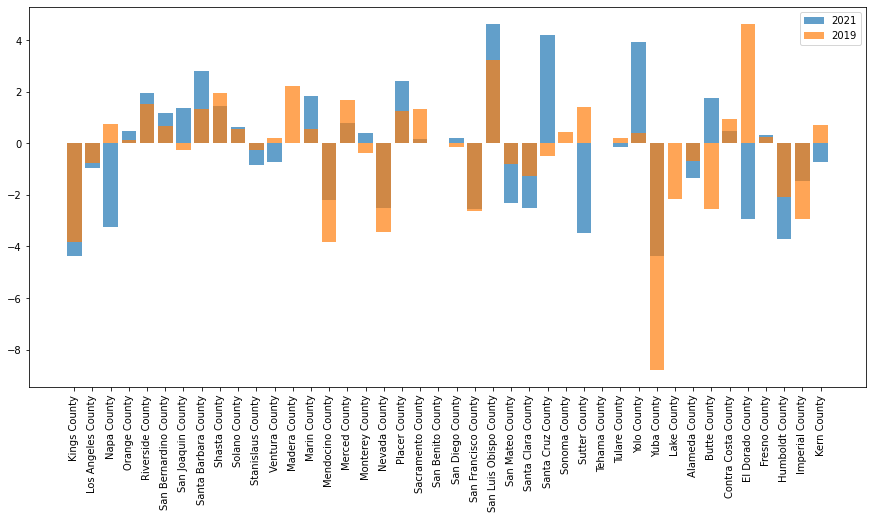

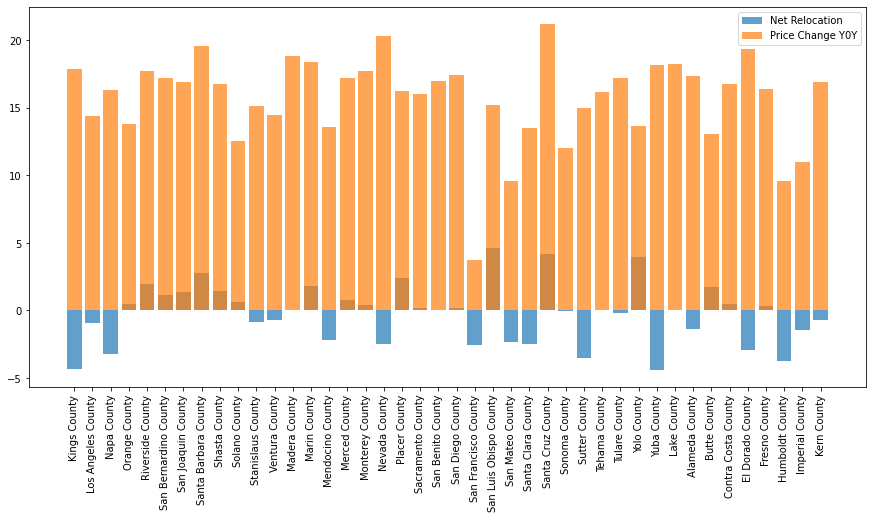

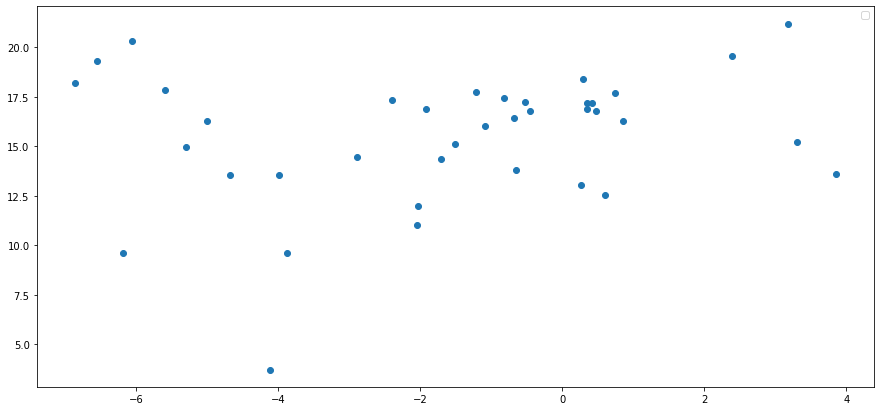

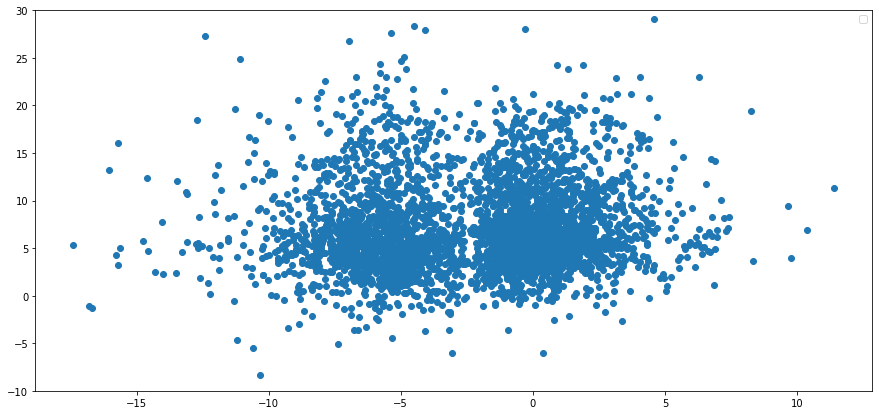

In [6]:
# sanity check

#year_to_include = [2021,2019]
#filter = merged_df[(merged_df['State'] == "California") & (merged_df['year'].isin(year_to_include))]
filter1 = merged_df[(merged_df['State'] == "California") & (merged_df['year']== 2021)]
filter2 = merged_df[(merged_df['State'] == "California") & (merged_df['year']== 2019)]
#plt.plot(filter['year'], filter['worked_from_home'])
#fig, ax = plt.subplots(figsize=(15, 9))
plt.rcParams['figure.figsize'] = [15, 7]
plt.bar(x=filter1['County'],height= filter1['Net_Relo_IN-OUT_St_Ratio'], label = "2021", alpha=0.7)
plt.bar(x=filter2['County'],height= filter2['Net_Relo_IN-OUT_St_Ratio'], label= "2019", alpha = 0.7)
plt.xticks(rotation=90)
plt.legend()
plt.show()


plt.rcParams['figure.figsize'] = [15, 7]
plt.bar(x=filter1['County'],height= filter1['Net_Relo_IN-OUT_St_Ratio'], label = "Net Relocation", alpha=0.7)
plt.bar(x=filter1['County'],height= filter1['Price_Change'], label= "Price Change Y0Y", alpha = 0.7)
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = [15, 7]
plt.scatter(filter1['Net_Relo_IN-OUT_NW_Ratio'],filter1['Price_Change'])
plt.legend()
plt.show()

plt.rcParams['figure.figsize'] = [15, 7]
plt.scatter(merged_df['Net_Relo_IN-OUT_NW_Ratio'],merged_df['Price_Change'])
plt.ylim((-10,30))
plt.legend()
plt.show()






In [7]:
filter1

,year,population,employed,worked_from_home,moved_in_within_state,moved_in_diff_state,population_1_year_ago,moved_out_same_state,moved_out_diff_state,County,...,Median_Home_Price,Price_Change,Total_IN_NW,Total_OUT_NW,Total_IN_Ratio,Total_OUT_Ratio,Net_Relo_IN-OUT_NW,Net_Relo_IN-OUT_St,Net_Relo_IN-OUT_St_Ratio,Net_Relo_IN-OUT_NW_Ratio
215,2021,153443,48332,0.0,0.0,0.0,148163.0,6465.0,1812.0,Kings County,...,2.776914e+05,17.846467,0.0,8277.0,0.000000,5.586415,-8277.0,-6465.0,-4.363438,-5.586415
216,2021,9829544,4385336,946616.0,112714.0,96937.0,9860279.0,207079.0,170804.0,Los Angeles County,...,7.262599e+05,14.376990,209651.0,377883.0,2.126218,3.832376,-168232.0,-94365.0,-0.957022,-1.706159
217,2021,136207,61547,12963.0,0.0,0.0,134145.0,4331.0,2382.0,Napa County,...,7.982363e+05,16.280461,0.0,6713.0,0.000000,5.004286,-6713.0,-4331.0,-3.228596,-5.004286
218,2021,3167809,1438671,338620.0,92485.0,34918.0,3136948.0,77651.0,70294.0,Orange County,...,8.330940e+05,13.787180,127403.0,147945.0,4.061368,4.716208,-20542.0,14834.0,0.472880,-0.654840
219,2021,2458395,998208,141189.0,97948.0,20178.0,2408440.0,51065.0,49172.0,Riverside County,...,4.817212e+05,17.720489,118126.0,100237.0,4.904669,4.161906,17889.0,46883.0,1.946613,0.742763
220,2021,2194710,891680,126327.0,74853.0,21823.0,2159994.0,49843.0,39169.0,San Bernardino County,...,4.368639e+05,17.216203,96676.0,89012.0,4.475753,4.120937,7664.0,25010.0,1.157874,0.354816
221,2021,789410,311229,36307.0,31955.0,3163.0,776234.0,21231.0,11186.0,San Joaquin County,...,4.644115e+05,16.872066,35118.0,32417.0,4.524151,4.176189,2701.0,10724.0,1.381542,0.347962
222,2021,446475,188442,31586.0,23758.0,9262.0,427301.0,11762.0,11062.0,Santa Barbara County,...,7.170375e+05,19.553715,33020.0,22824.0,7.727574,5.341434,10196.0,11996.0,2.807389,2.386140
225,2021,182139,67216,0.0,6767.0,1342.0,179041.0,4188.0,3076.0,Shasta County,...,3.269861e+05,16.766051,8109.0,7264.0,4.529130,4.057171,845.0,2579.0,1.440452,0.471959
226,2021,451716,190243,25953.0,16452.0,5651.0,442015.0,13700.0,5733.0,Solano County,...,5.273262e+05,12.557388,22103.0,19433.0,5.000509,4.396457,2670.0,2752.0,0.622603,0.604052


In [9]:
df_1 = sm.add_constant(filter1) 
df = df_1.dropna() 

# Create your X and Y variables
X = df['Net_Relo_IN-OUT_NW_Ratio']
Y = df['Price_Change']

# Fit the model
model = sm.OLS(Y, sm.add_constant(X)).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Price_Change   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.469
Date:                Fri, 24 Feb 2023   Prob (F-statistic):              0.233
Time:                        01:17:57   Log-Likelihood:                -98.602
No. Observations:                  38   AIC:                             201.2
Df Residuals:                      36   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   